In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis

In [2]:
df = pd.read_csv('banking_data.csv')

# Data exploration
df.info() # Analyze the datatypes of every column
df.describe() # Analyze the statistics of numerical columns

# Remove redundant column
df.drop(columns='marital_status', axis = 1, inplace = True)

# Drop the missing data
df.dropna(inplace=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45216 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45216 non-null  int64 
 1   job             45216 non-null  object
 2   marital         45213 non-null  object
 3   marital_status  45213 non-null  object
 4   education       45213 non-null  object
 5   default         45216 non-null  object
 6   balance         45216 non-null  int64 
 7   housing         45216 non-null  object
 8   loan            45216 non-null  object
 9   contact         45216 non-null  object
 10  day             45216 non-null  int64 
 11  month           45216 non-null  object
 12  day_month       45216 non-null  object
 13  duration        45216 non-null  int64 
 14  campaign        45216 non-null  int64 
 15  pdays           45216 non-null  int64 
 16  previous        45216 non-null  int64 
 17  poutcome        45216 non-null  object
 18  y     

## Plot the Distributions

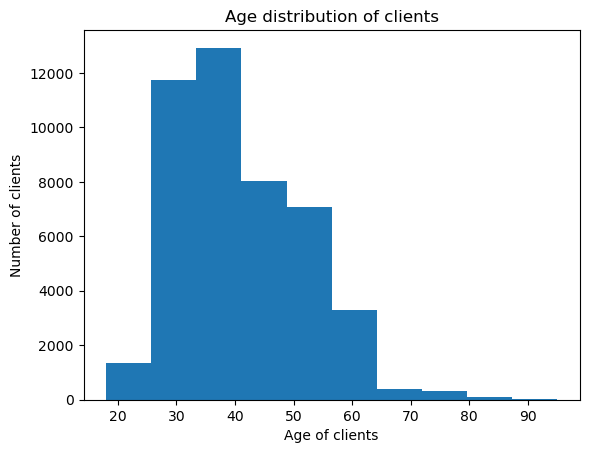

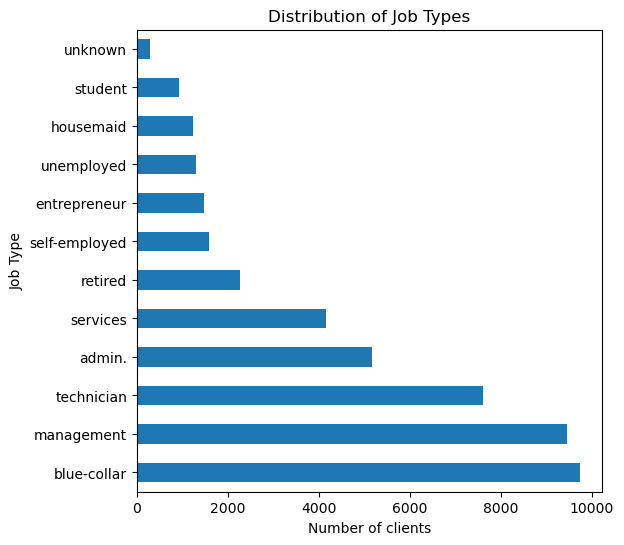

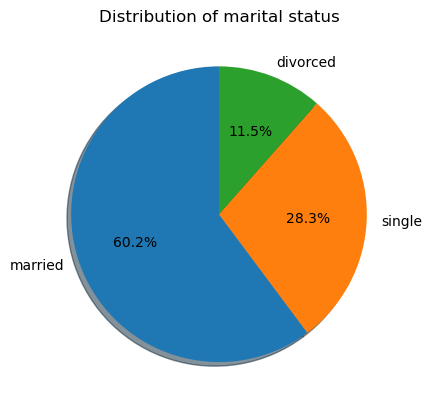

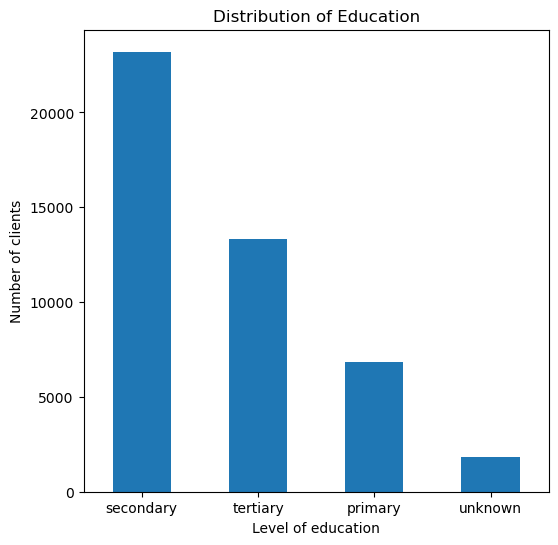

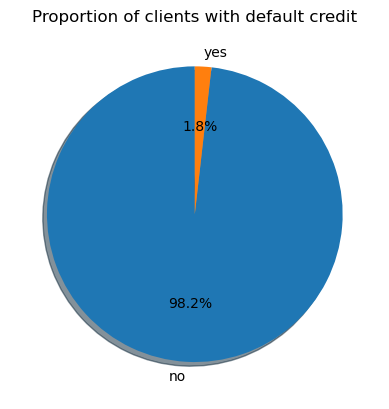

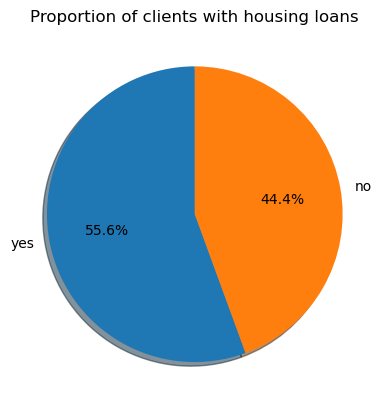

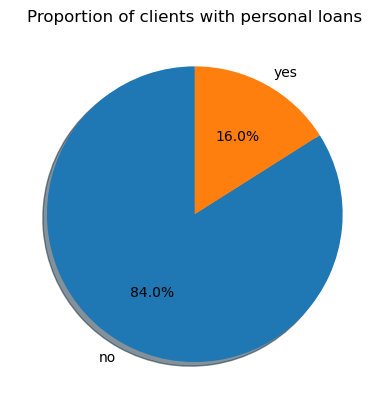

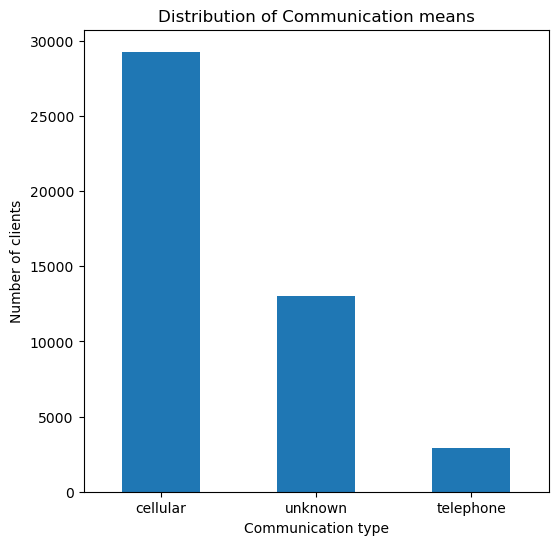

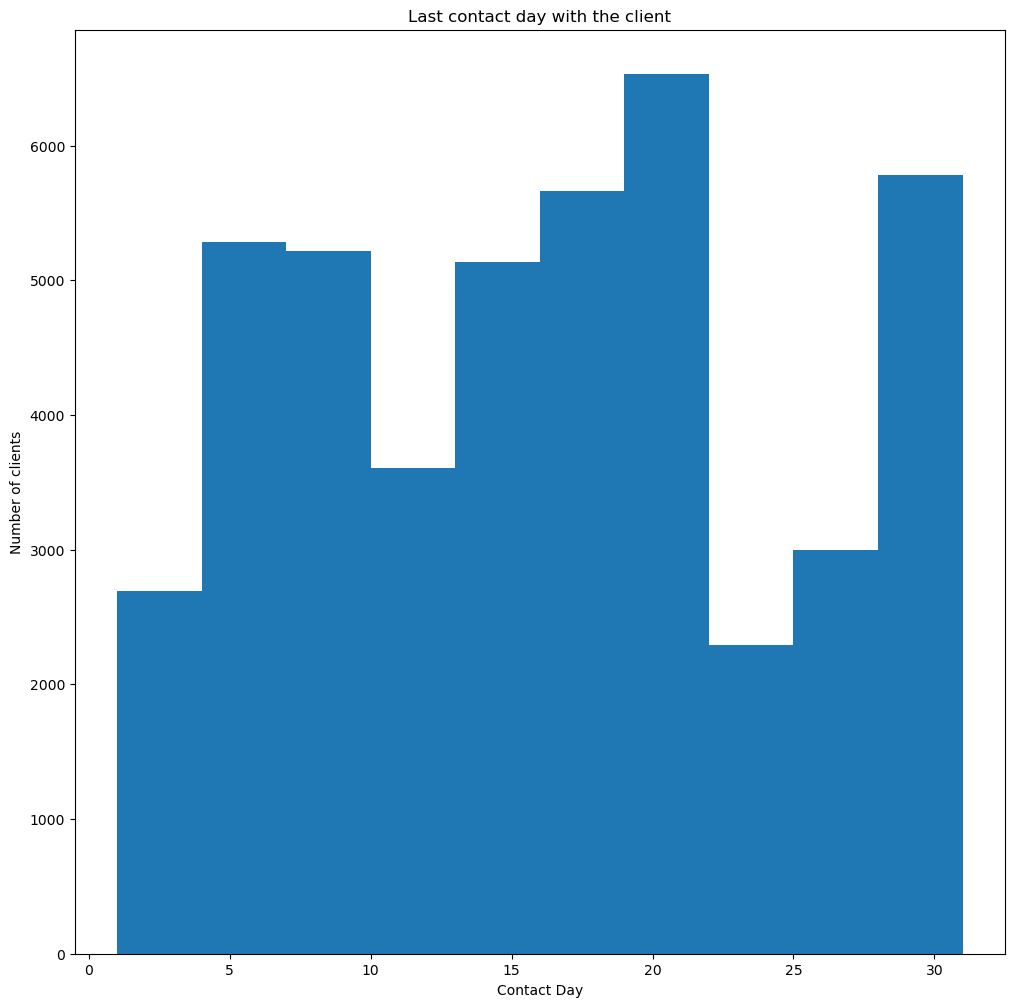

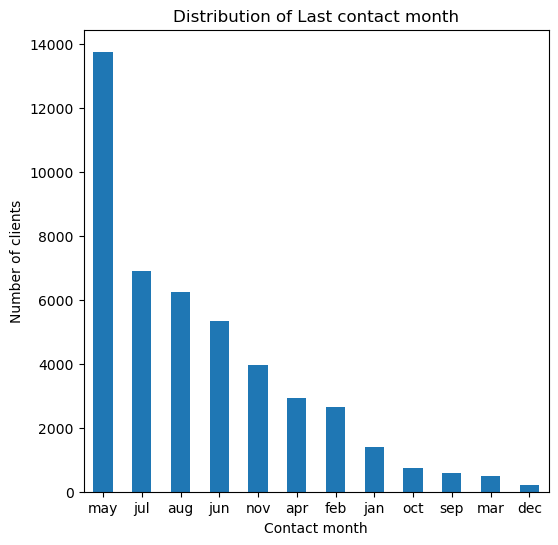

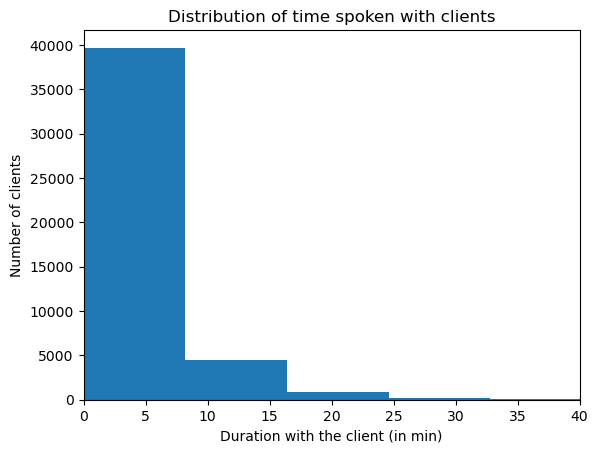

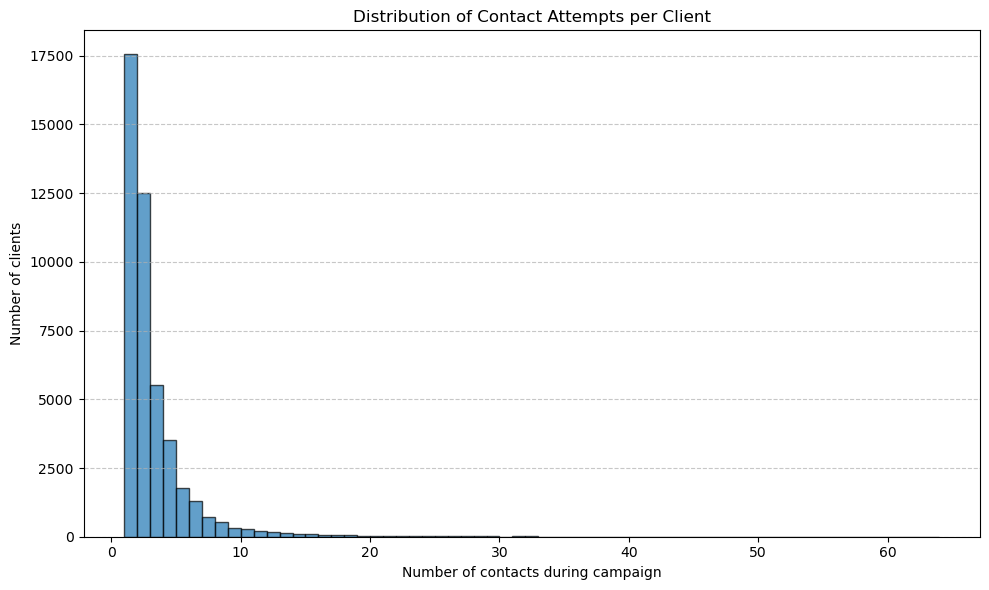

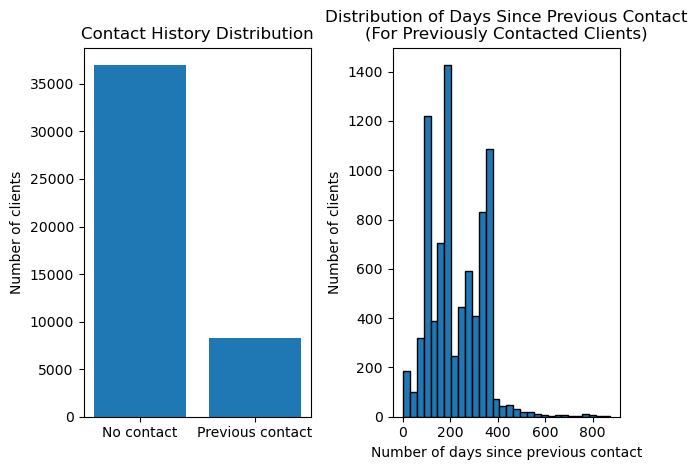

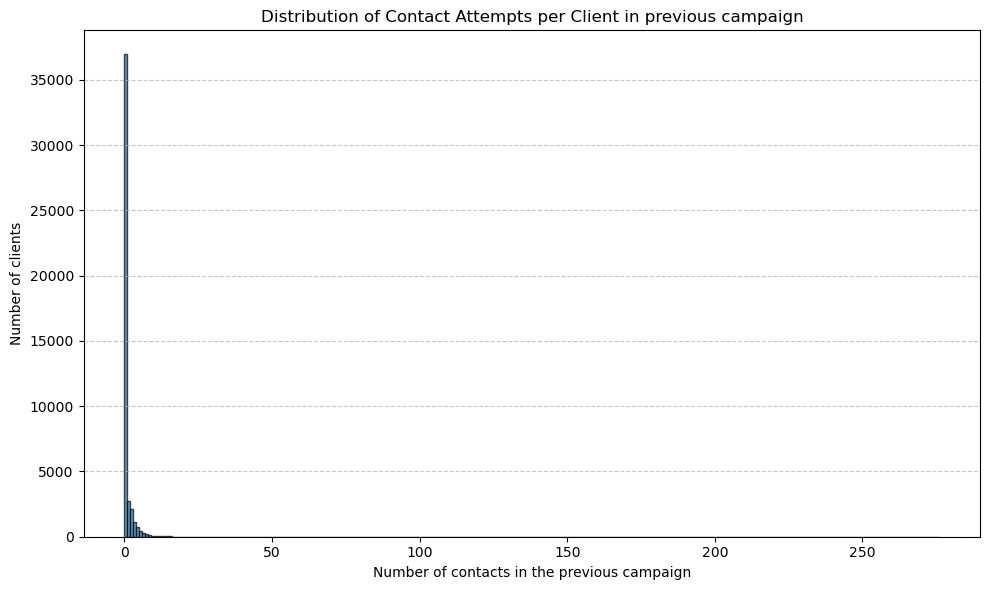

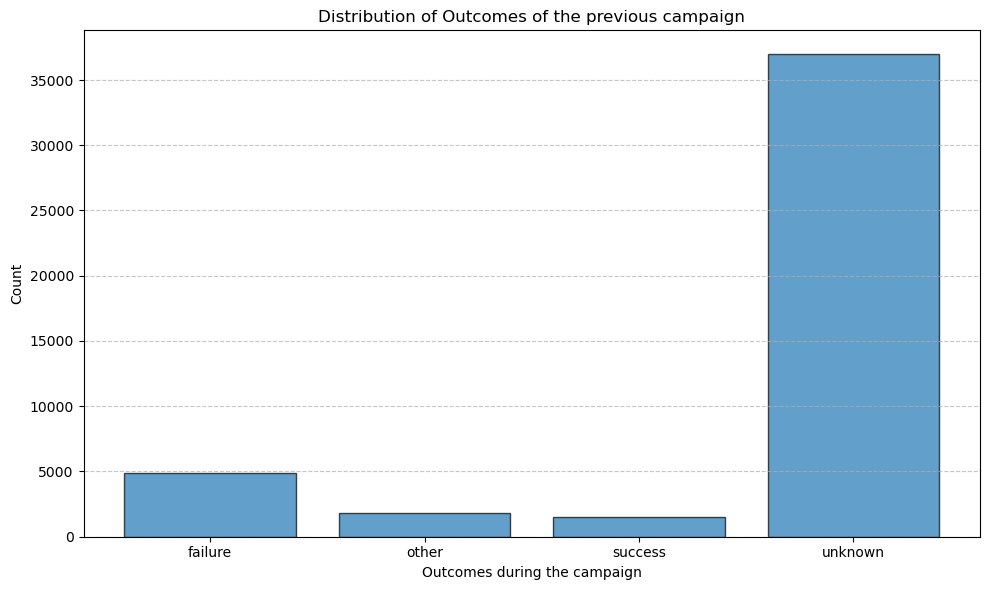

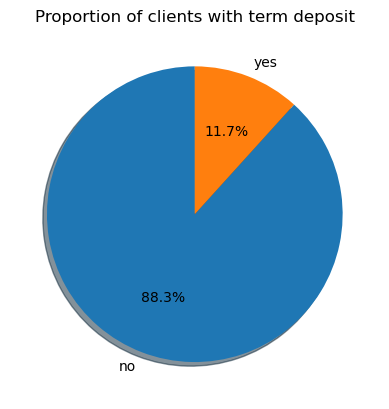

In [3]:
# Distribution of Age among clients
plt.hist(df['age'])
plt.xlabel('Age of clients')
plt.ylabel('Number of clients')
plt.title('Age distribution of clients')
plt.show()

# Bar plot for job type
plt.figure(figsize=(6,6))
df['job'].value_counts().sort_values(ascending=False).plot(kind = 'barh')
plt.title('Distribution of Job Types')
plt.xlabel('Number of clients')
plt.ylabel('Job Type')
plt.show()

# Pie chart for marital status distribution
plt.pie(df['marital'].value_counts(), labels = df['marital'].unique(), autopct='%1.1f%%', startangle=90, shadow = True)
plt.title('Distribution of marital status')
plt.show()

# Bar plot for level of education among clients
plt.figure(figsize=(6,6))
df['education'].value_counts().plot(kind = 'bar')
plt.title('Distribution of Education')
plt.xlabel('Level of education')
plt.ylabel('Number of clients')
plt.xticks(rotation = 0)
plt.show()

# Pie chart for clients with default credit
plt.pie(df['default'].value_counts(), labels = df['default'].unique(), autopct='%1.1f%%', startangle=90, shadow = True)
plt.title('Proportion of clients with default credit')
plt.show()

# Pie chart for clients with housing loans
plt.pie(df['housing'].value_counts(), labels = df['housing'].unique(), autopct='%1.1f%%', startangle=90, shadow = True)
plt.title('Proportion of clients with housing loans')
plt.show()

# Pie chart for clients with personal loans
plt.pie(df['loan'].value_counts(), labels = df['loan'].unique(), autopct='%1.1f%%', startangle=90, shadow = True)
plt.title('Proportion of clients with personal loans')
plt.show()

# Bar plot for types of communication employed among clients
plt.figure(figsize=(6,6))
df['contact'].value_counts().plot(kind = 'bar')
plt.title('Distribution of Communication means')
plt.xlabel('Communication type')
plt.ylabel('Number of clients')
plt.xticks(rotation = 0)
plt.show()

# Histogram for distribution of last contact day
plt.figure(figsize=(12,12))
plt.hist(df['day'])
plt.xlabel('Contact Day')
plt.ylabel('Number of clients')
plt.title('Last contact day with the client')
plt.show()

# Bar plot for distribution of contact month
plt.figure(figsize=(6,6))
df['month'].value_counts().plot(kind = 'bar')
plt.title('Distribution of Last contact month')
plt.xlabel('Contact month')
plt.ylabel('Number of clients')
plt.xticks(rotation = 0)
plt.show()

# Histogram for distribution of last contact duration
df['duration_in_min'] = df['duration'] / 60 # Convert duration in seconds to minutes
plt.hist(df['duration_in_min']) 
plt.xlabel('Duration with the client (in min)')
plt.ylabel('Number of clients')
plt.xlim([0, 40])
plt.title('Distribution of time spoken with clients')
plt.show()

# Histogram for number of contacts performed during the campaign
plt.figure(figsize=(10, 6))  # More suitable aspect ratio

# Using hist with specific bins
plt.hist(df['campaign'], bins=range(min(df['campaign']), max(df['campaign']) + 2, 1),
         edgecolor='black', alpha=0.7)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xlabel('Number of contacts during campaign')
plt.ylabel('Number of clients')
plt.title('Distribution of Contact Attempts per Client')

plt.tight_layout()
plt.show()

# Distribution of days passed since last contact
# Create two plots side by side
plt.subplot(1, 2, 1)
# Count how many were never contacted (-1) vs contacted before
never_contacted = (df['pdays'] == -1).sum()
contacted_before = (df['pdays'] != -1).sum()
plt.bar(['No contact', 'Previous contact'], 
        [never_contacted, contacted_before])
plt.title('Contact History Distribution')
plt.ylabel('Number of clients')

# For the second plot, show distribution of days for those who were contacted
plt.subplot(1, 2, 2)
# Only include pdays > 0 (excluding -1)
contacted_days = df[df['pdays'] != -1]['pdays']
plt.hist(contacted_days, bins=30, edgecolor='black')
plt.title('Distribution of Days Since Previous Contact\n(For Previously Contacted Clients)')
plt.xlabel('Number of days since previous contact')
plt.ylabel('Number of clients')

plt.tight_layout()
plt.show()

# Histogram for number of contacts performed in the previous campaign
plt.figure(figsize=(10, 6))  # More suitable aspect ratio

# Using hist with specific bins
plt.hist(df['previous'], bins=range(min(df['previous']), max(df['previous']) + 2, 1),
         edgecolor='black', alpha=0.7)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xlabel('Number of contacts in the previous campaign')
plt.ylabel('Number of clients')
plt.title('Distribution of Contact Attempts per Client in previous campaign')

plt.tight_layout()
plt.show()

# Bar plot for campaign outcomes
plt.figure(figsize=(10, 6))

# Using value_counts for exact frequencies
contact_counts = df['poutcome'].value_counts().sort_index()
plt.bar(contact_counts.index, contact_counts.values, 
        edgecolor='black', alpha=0.7)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Outcomes during the campaign')
plt.ylabel('Count')
plt.title('Distribution of Outcomes of the previous campaign')

plt.tight_layout()
plt.show()

# Pie chart for distriubtion of clients with term deposit
plt.pie(df['y'].value_counts(), labels = df['y'].unique(), autopct='%1.1f%%', startangle=90, shadow = True)
plt.title('Proportion of clients with term deposit')
plt.show()

## Correlation and Statistical Analysis

Correlations with term deposit subscription:
y_numeric    1.000000
duration     0.394472
pdays        0.103813
previous     0.093628
balance      0.052844
age          0.025718
day         -0.028264
campaign    -0.073277
Name: y_numeric, dtype: float64


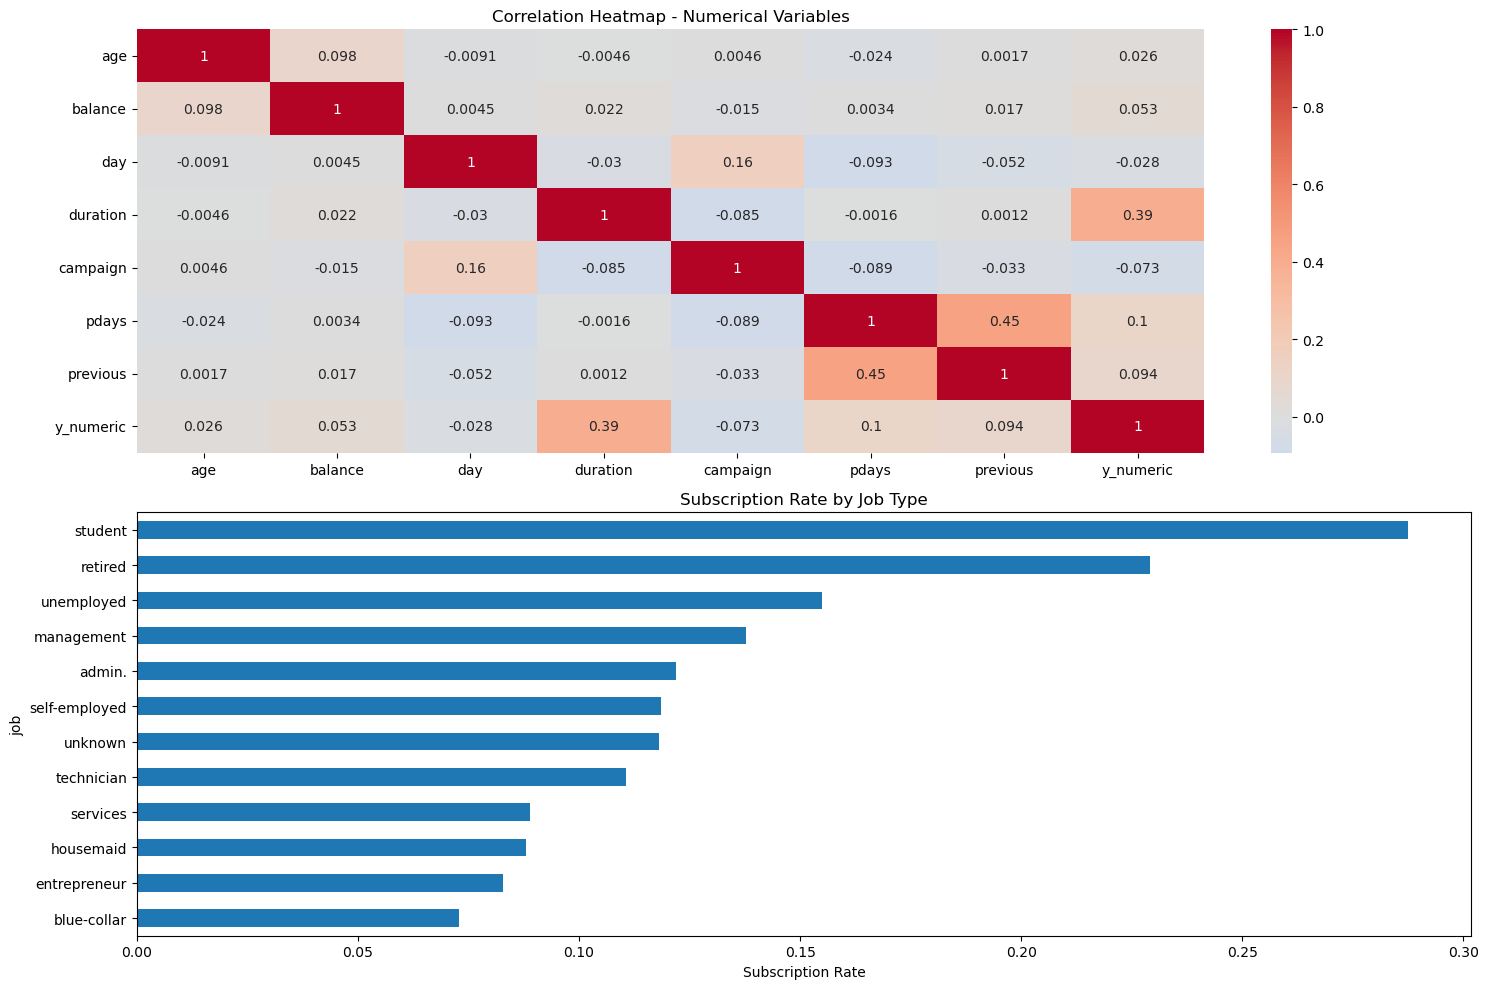


Subscription rates by categories:

JOB category:
               Count  Subscription Rate
job                                    
admin.          5171              0.122
blue-collar     9731              0.073
entrepreneur    1487              0.083
housemaid       1240              0.088
management      9458              0.138
retired         2266              0.229
self-employed   1579              0.118
services        4154              0.089
student          936              0.287
technician      7597              0.111
unemployed      1303              0.155
unknown          288              0.118

MARITAL category:
          Count  Subscription Rate
marital                           
divorced   5207              0.120
married   27216              0.101
single    12787              0.150

EDUCATION category:
           Count  Subscription Rate
education                          
primary     6851              0.086
secondary  23201              0.106
tertiary   13301              0

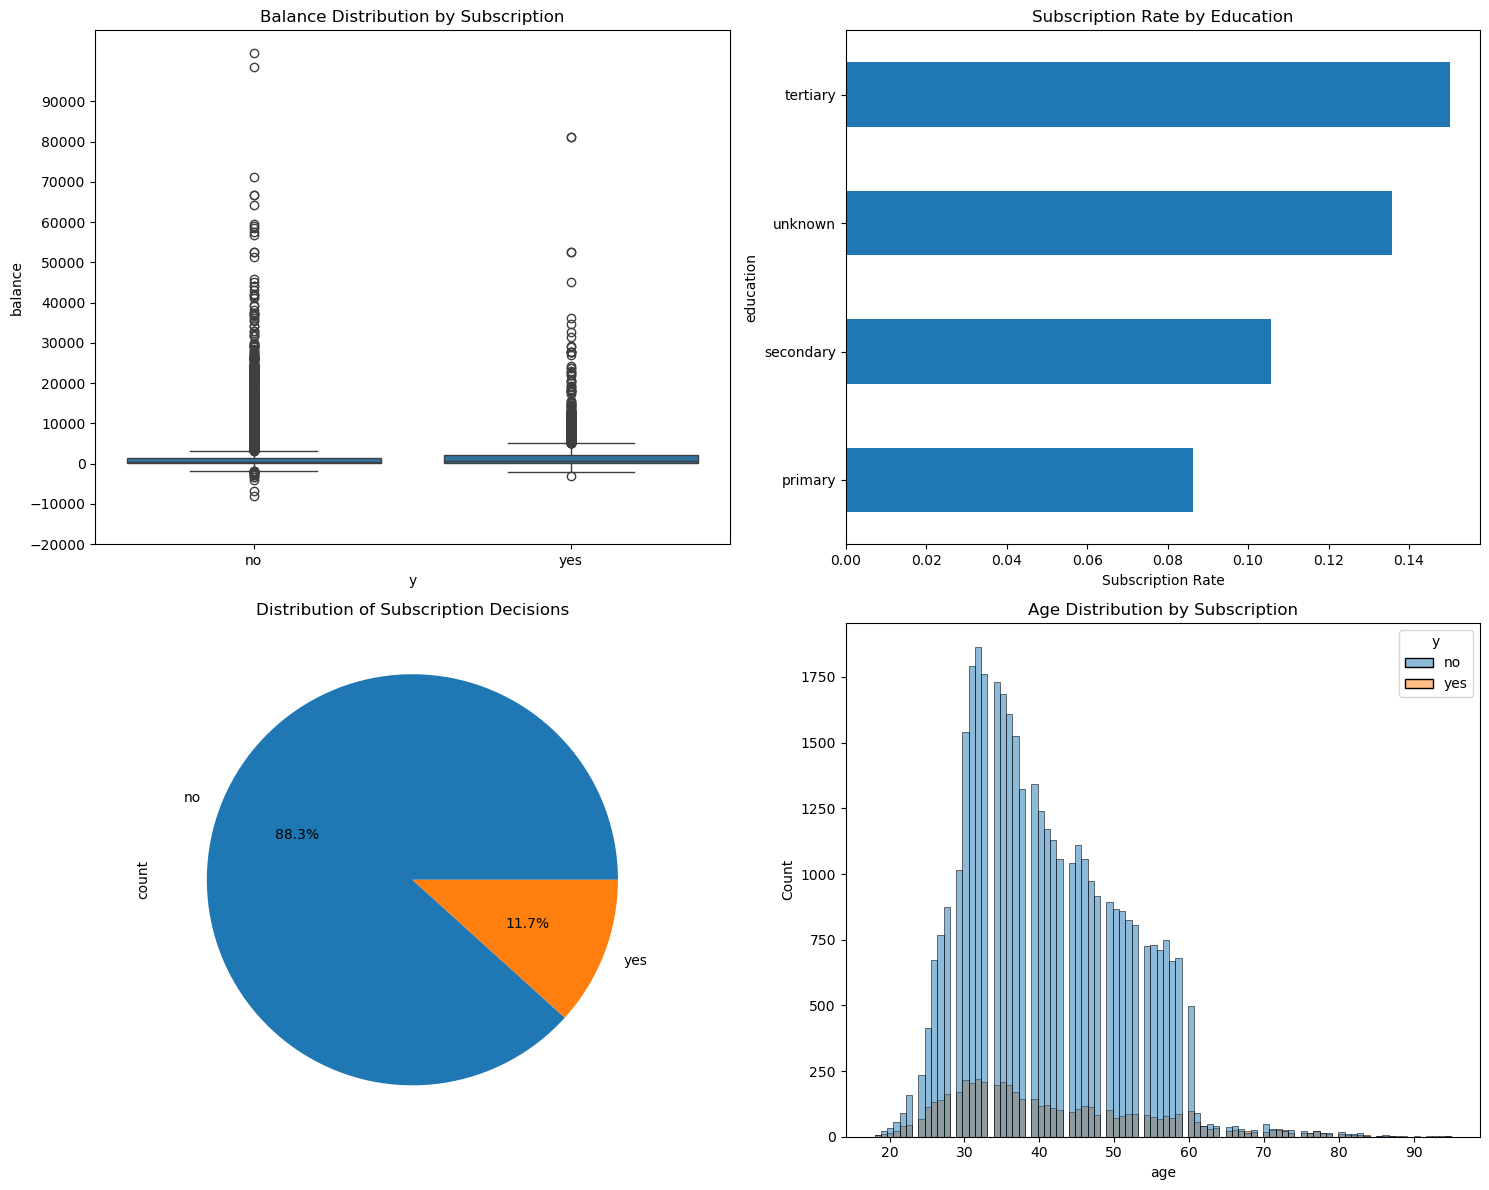


Statistical Analysis:

Numerical Variables Analysis:

AGE:
p-value: 0.0748132131
Median for subscribers: 38.0
Median for non-subscribers: 39.0

BALANCE:
p-value: 0.0000000000
Median for subscribers: 733.0
Median for non-subscribers: 417.0

DURATION:
p-value: 0.0000000000
Median for subscribers: 426.0
Median for non-subscribers: 164.0

CAMPAIGN:
p-value: 0.0000000000
Median for subscribers: 2.0
Median for non-subscribers: 2.0

Categorical Variables Analysis:

JOB:
Chi-square p-value: 0.0000000000
Success rates by category:
job
admin.           12.20
blue-collar       7.28
entrepreneur      8.27
housemaid         8.79
management       13.77
retired          22.90
self-employed    11.84
services          8.88
student          28.74
technician       11.06
unemployed       15.50
unknown          11.81
Name: count, dtype: float64

MARITAL:
Chi-square p-value: 0.0000000000
Success rates by category:
marital
married     10.13
single      14.95
divorced    11.96
Name: count, dtype: float64

ED

In [4]:
# Analyze correlation between subscribing for term deposit and different attributes
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# First, analyze numerical variables
numerical_vars = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Create a figure with subplots
plt.figure(figsize=(15, 10))

# Convert y to numeric (1 for 'yes', 0 for 'no')
df['y_numeric'] = (df['y'] == 'yes').astype(int)

# Calculate correlations for numerical variables
correlations = df[numerical_vars + ['y_numeric']].corr()['y_numeric'].sort_values(ascending=False)
print("Correlations with term deposit subscription:")
print(correlations)

# Create correlation heatmap
plt.subplot(2,1,1)
sns.heatmap(df[numerical_vars + ['y_numeric']].corr(), 
            annot=True, 
            cmap='coolwarm', 
            center=0)
plt.title('Correlation Heatmap - Numerical Variables')

# For categorical variables, calculate subscription rate for each category
categorical_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Create a subplot for categorical variables
plt.subplot(2,1,2)
# Example with one categorical variable (e.g., 'job')
subscription_rates = df.groupby('job')['y_numeric'].mean().sort_values(ascending=True)
subscription_rates.plot(kind='barh')
plt.title('Subscription Rate by Job Type')
plt.xlabel('Subscription Rate')

plt.tight_layout()
plt.show()

# Create binary numeric y variable
df['y_numeric'] = (df['y'] == 'yes').astype(int)

# Print subscription rates for all categorical variables
print("\nSubscription rates by categories:")
for var in categorical_vars:
    print(f"\n{var.upper()} category:")
    rates = df.groupby(var)['y_numeric'].agg(['count', 'mean']).round(3)
    rates.columns = ['Count', 'Subscription Rate']
    print(rates)


# Set up the plots
plt.figure(figsize=(15, 12))

# 1. Box plots for numerical variables vs subscription
numerical_vars = ['age', 'balance', 'duration', 'campaign']
plt.subplot(2, 2, 1)
sns.boxplot(x='y', y='balance', data=df)
plt.title('Balance Distribution by Subscription')
plt.yticks(np.arange(-20000, 100000, 10000))  # Creates ticks every 10000 units from -20000 to 100000

# 2. Bar chart for categorical variables
plt.subplot(2, 2, 2)
subscription_by_education = df.groupby('education')['y_numeric'].mean().sort_values()
subscription_by_education.plot(kind='barh')
plt.title('Subscription Rate by Education')
plt.xlabel('Subscription Rate')

# 3. Pie chart for binary outcome (y)
plt.subplot(2, 2, 3)
df['y'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Subscription Decisions')

# 4. Histogram with subscription overlay
plt.subplot(2, 2, 4)
sns.histplot(data=df, x='age', hue='y', multiple="layer", alpha=.5)
plt.title('Age Distribution by Subscription')

plt.tight_layout()
plt.show()

# Statistical Analysis
print("\nStatistical Analysis:")

# 1. For numerical variables - Mann-Whitney U test
from scipy.stats import mannwhitneyu

print("\nNumerical Variables Analysis:")
for var in numerical_vars:
    stat, p = mannwhitneyu(df[df['y']=='yes'][var], df[df['y']=='no'][var])
    print(f"\n{var.upper()}:")
    print(f"p-value: {p:.10f}")
    print("Median for subscribers:", df[df['y']=='yes'][var].median())
    print("Median for non-subscribers:", df[df['y']=='no'][var].median())

# 2. For categorical variables - Chi-square test
from scipy.stats import chi2_contingency

categorical_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan']
print("\nCategorical Variables Analysis:")
for var in categorical_vars:
    contingency = pd.crosstab(df[var], df['y'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"\n{var.upper()}:")
    print(f"Chi-square p-value: {p:.10f}")
    success_rate = df[df['y']=='yes'][var].value_counts() / df[var].value_counts() * 100
    print("Success rates by category:")
    print(success_rate.round(2))

## Plots for term deposit subscription v/s categorical variables

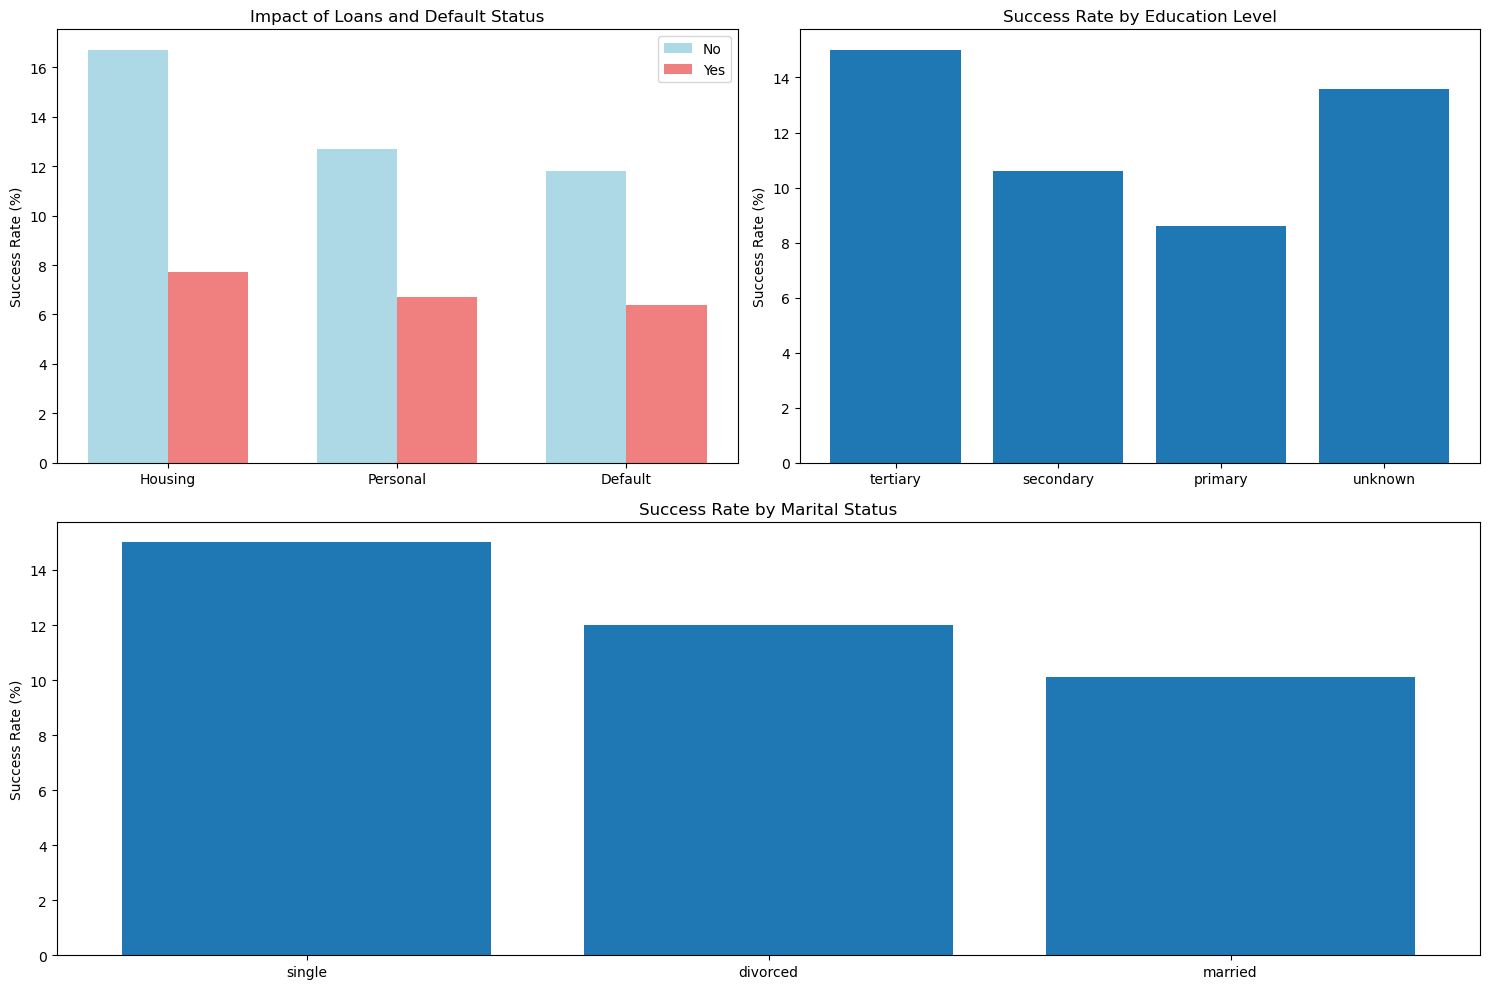

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create figure with subplots using gridspec
fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(2, 2)

# 1. Loan and Default Impact (Top Left)
ax1 = fig.add_subplot(gs[0, 0])
loan_data = {
    'Housing Loan': [16.7, 7.7],
    'Personal Loan': [12.7, 6.7],
    'Default Status': [11.8, 6.4]
}

x = np.arange(3)
width = 0.35

ax1.bar(x - width/2, [16.7, 12.7, 11.8], width, label='No', color='lightblue')
ax1.bar(x + width/2, [7.7, 6.7, 6.4], width, label='Yes', color='lightcoral')
ax1.set_xticks(x)
ax1.set_xticklabels(['Housing', 'Personal', 'Default'])
ax1.set_ylabel('Success Rate (%)')
ax1.set_title('Impact of Loans and Default Status')
ax1.legend()

# 2. Education Level Impact (Top Right)
ax2 = fig.add_subplot(gs[0, 1])
education_data = {
    'tertiary': 15.0,
    'secondary': 10.6,
    'primary': 8.6,
    'unknown': 13.6
}
ax2.bar(education_data.keys(), education_data.values())
ax2.set_ylabel('Success Rate (%)')
ax2.set_title('Success Rate by Education Level')

# 3. Marital Status Impact (Bottom, spanning both columns)
ax3 = fig.add_subplot(gs[1, :])
marital_data = {
    'single': 15.0,
    'divorced': 12.0,
    'married': 10.1
}
ax3.bar(marital_data.keys(), marital_data.values())
ax3.set_ylabel('Success Rate (%)')
ax3.set_title('Success Rate by Marital Status')

plt.tight_layout()
plt.show()